In [1]:
from __future__ import division
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from matplotlib.legend_handler import HandlerLine2D
import cmath
import time

In [2]:
def p(x):
    return x[1]*(1-x[0])*(1+x[1])*x[0]

In [952]:
-math.log(p(np.array([0.5,-0.5])) + 0.06251)

11.512925464970616

In [3]:
def f(x):
    return -math.log(p(x))

In [4]:
def f_Clean(x):
    if p(x) <= 0:
        return 0
    else:    
        return -math.log(p(x))

In [5]:
def f_Extended2(x):
    return -cmath.log(p(x)).real

In [993]:
print(-1 <= -0.2 >= 0)

False


In [972]:
-cmath.log(p(np.array([0.5,-0.5]))).real

(1.6739764335716716-0j)

y*(1-x)*(1+y)*x = (y+y^2)*(x-x^2)

f1 = (x-x^2) --> Positivo quando  0 < x < 1; Else Negativo;
f2 = (y+y^2) --> Negativo quando -1 < y < 0; Else Positivo;

Quadrantes de f1*f2

sinal fator1
sinal fator2
(sinal resultante f1*f2)

In [882]:
#       y
#  f1-  |  f1+  |  f1-    
#  f2+  |  f2+  |  f2+    
#  (-)  |  (+)  |  (-)  
# ----(0,0)---(1,0)-----x
#  f1-  |  f1+  |  f1-    
#  f2-  |  f2-  |  f2-   
#  (+)  |  (-)  |  (+)
# ----(0,-1)--(1,-1)----
#  f1-  |  f1+  |  f1-   
#  f2+  |  f2+  |  f2+   
#  (-)  |  (+)  |  (-)  

https://www.wolframalpha.com/input/?i=y%281-x%29%281%2By%29x

Importante perceber que se um dos termos for = 0, o resultado pode ser 0, e não o dado pelo seu quadrante.

Importante lembrar que a função é -ln(f1*f2), porém ln(+) = + e ln(-) = indef, logo a região viável é apenas
os quadrantes 2,4,6 e 8. 

https://www.wolframalpha.com/input/?i=-ln%28y%281-x%29%281%2By%29x%29

(No grafico eles continuam analiticamente a função log para fora do domínio normal, provavelmente com um Branch Cut e considerando a parte real, assim como o a função log da biblioteca cmath)

http://mathworld.wolfram.com/BranchCut.html


Como o quadrante 5 se encontra rodeado de regiões positivas, é provável que nele se encontre um mínimo local bem
comportado.

9 quadrantes


In [4]:
p([0.3,-1.2])

0.050399999999999986

In [38]:
f([0.3,0.4])

2.1404662435176105

Gradiente

É importante garantir que a sequência x^k realmente converge para um ótimo, o que deve ocorrer em certos quadrantes,
como observamos no estudo.
Come¸camos com um ponto inicial x e depois geramos uma sequencia
x_k ⊂ R^n na qual a função objetivo decresce.

Derivadas da função objetivo

In [6]:
def df(x):
    return np.array([df_x(x),df_y(x)])

In [7]:
def df_x(x): 
    return (1-2*x[0])/(x[0]-1)*x[0]

In [8]:
def df_y(x):
    return - (2*x[1] + 1)/(x[1]**2 +x[1])

Algoritmo de Descida pelo Gradiente

In [301]:
def descGradiente2(x,t,eps,max_iters,comCheckViavel):
    steps = np.array([[x[0],x[1]]])
    
    if(comCheckViavel):
        if p(x) <= 0:
            print("Ponto Inicial fora da zona viável")
            return steps
        
    for _i in range(max_iters):
        x_k = np.copy(x)
        
        x = np.subtract(x_k,t * df(x_k))
        
        steps = np.append(steps, [x], axis=0)
                
        if(comCheckViavel):
            if p(x) <= 0:
                print("Saiu da zona viável")
                break
            
        if abs(np.sum(np.absolute(np.subtract(x,x_k)))) <= eps: #Check passo muito pequeno (chegando perto do gradiente zero)
            print("Minimum at ", x)
            break  
        if np.absolute(x).any() > 2: # Para não ir muito longe < max_iters
            print("Fugiu")
            break
    return steps

Minimum at  [ 0.5 -0.5]
0.058812856674194336


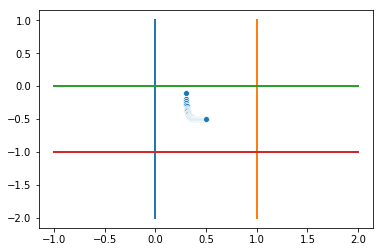

In [319]:
x = [0.3,-0.1] # Ponto Inicial
t = 0.01  # Tamanho do Paso
eps = 0.0000000000001  # Precisão
max_iters = 100000  # Máx iterações

t0 = time.time()
steps = descGradiente2(x,t,eps,max_iters,False)
tf = time.time()

print(tf-t0)

sns.scatterplot(x=np.transpose(steps)[0],y=np.transpose(steps)[1])

plt.plot((0,0),(1,-2), linewidth=2)
plt.plot((1,1),(1,-2), linewidth=2)
plt.plot((2,-1),(0,0), linewidth=2)
plt.plot((2,-1),(-1,-1), linewidth=2)

In [322]:
for i in steps:
    print(i)

[ 0.3 -0.1]
[ 0.30171429 -0.18888889]
[ 0.30342779 -0.2295013 ]
[ 0.30514033 -0.26009543]
[ 0.30685174 -0.2850276 ]
[ 0.30856185 -0.30612537]
[ 0.31027047 -0.3243799 ]
[ 0.31197745 -0.34040673]
[ 0.31368259 -0.3546225 ]
[ 0.31538572 -0.36732669]
[ 0.31708667 -0.37874447]
[ 0.31878526 -0.38905106]
[ 0.3204813  -0.39838664]
[ 0.32217463 -0.40686592]
[ 0.32386506 -0.41458444]
[ 0.32555242 -0.4216231 ]
[ 0.32723652 -0.4280512 ]
[ 0.32891718 -0.43392881]
[ 0.33059423 -0.43930844]
[ 0.3322675  -0.44423637]
[ 0.33393679 -0.44875365]
[ 0.33560194 -0.45289688]
[ 0.33726276 -0.45669887]
[ 0.33891908 -0.46018914]
[ 0.34057072 -0.46339433]
[ 0.3422175  -0.46633856]
[ 0.34385926 -0.46904374]
[ 0.34549581 -0.47152977]
[ 0.34712699 -0.4738148 ]
[ 0.34875261 -0.47591537]
[ 0.35037252 -0.47784663]
[ 0.35198653 -0.47962238]
[ 0.35359448 -0.4812553 ]
[ 0.35519621 -0.48275699]
[ 0.35679154 -0.48413807]
[ 0.35838031 -0.48540831]
[ 0.35996236 -0.48657664]
[ 0.36153752 -0.48765128]
[ 0.36310565 -0.48863978]


[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.5 -0.5]
[ 0.

In [320]:
def descGradiente(x,t,eps,max_iters,comCheckViavel):
    steps_x = []
    steps_y = []
    steps_x.append(x[0])
    steps_y.append(x[1])

    if(comCheckViavel):
        if p(x) <= 0:
            print("Ponto Inicial fora da zona viável")
            return steps_x,steps_y
        
    for _i in range(max_iters):
        x_k = x.copy()
        
        x[0] = x_k[0] - t * df_x(x_k)
        x[1] = x_k[1] - t * df_y(x_k)
        
        steps_x.append(x[0])
        steps_y.append(x[1])
        
        if(comCheckViavel):
            if p(x) <= 0:
                print("Saiu da zona viável")
                break
            
        step = np.sum(np.absolute(np.subtract(x,x_k)))
        if abs(step) <= eps: #Check passo muito pequeno (chegando perto do gradiente zero)
            print("Minimum at ", x)
            break  
        if abs(x[0] - steps_x[0]) > 2 or abs(x[1] - steps_y[0]) > 2: # Para não ir muito longe < max_iters
            print("Fugiu")
            break
    return steps_x, steps_y

Gradiente com ponto inicial nos 9 quadrantes, com e sem considerar a região viável

Fugiu
Fugiu
Fugiu
Fugiu
Minimum at  [0.5000000000048634, -0.49999999999999967]
Fugiu
Fugiu
Fugiu
Fugiu


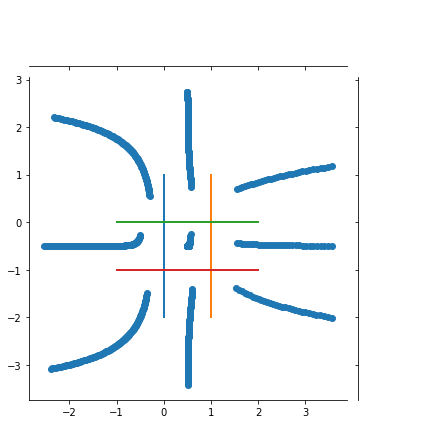

In [323]:
offset = np.random.rand(1,18)

steps_x1,steps_y1 = descGradiente([-0.5 + offset[0][0]/4,0.5+ offset[0][1]/4],t,eps,max_iters,False)
steps_x2,steps_y2 = descGradiente([-0.5 + offset[0][2]/4,-0.5 + offset[0][3]/4],t,eps,max_iters,False)
steps_x3,steps_y3 = descGradiente([-0.5 + offset[0][4]/4,-1.5 + offset[0][5]/4],t,eps,max_iters,False)

steps_x4,steps_y4 = descGradiente([0.5 + offset[0][6]/4,0.5 + offset[0][7]/4],t,eps,max_iters,False)
steps_x5,steps_y5 = descGradiente([0.5 + offset[0][8]/4,-0.5 + offset[0][9]/4],t,eps,max_iters,False)
steps_x6,steps_y6 = descGradiente([0.5 + offset[0][10]/4,-1.5 + offset[0][11]/4],t,eps,max_iters,False)

steps_x7,steps_y7 = descGradiente([1.5 + offset[0][12]/4,0.5 + offset[0][13]/4],t,eps,max_iters,False)
steps_x8,steps_y8 = descGradiente([1.5 + offset[0][14]/4,-0.5 + offset[0][15]/4],t,eps,max_iters,False)
steps_x9,steps_y9 = descGradiente([1.5 + offset[0][16]/4,-1.5 + offset[0][17]/4],t,eps,max_iters,False)

fullstepsx = np.concatenate((steps_x1,steps_x2,steps_x3,steps_x4,steps_x5,steps_x6,steps_x7,steps_x8,steps_x9))
fullstepsy = np.concatenate((steps_y1,steps_y2,steps_y3,steps_y4,steps_y5,steps_y6,steps_y7,steps_y8,steps_y9))
sct = sns.JointGrid(fullstepsx,fullstepsy)
sct.plot_joint(plt.scatter)
plt.plot((0,0),(1,-2), linewidth=2)
plt.plot((1,1),(1,-2), linewidth=2)
plt.plot((2,-1),(0,0), linewidth=2)
plt.plot((2,-1),(-1,-1), linewidth=2)

Ponto Inicial fora da zona viável
Fugiu
Ponto Inicial fora da zona viável
Fugiu
Ponto Inicial fora da zona viável
Fugiu
Ponto Inicial fora da zona viável
Fugiu
Ponto Inicial fora da zona viável


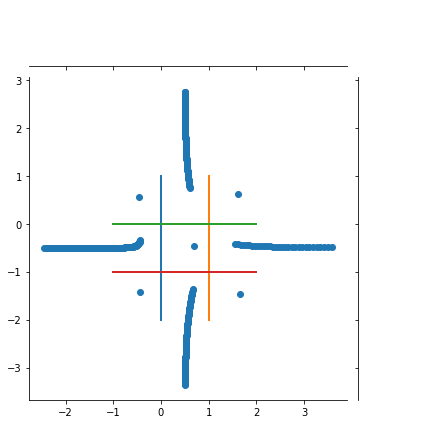

In [324]:
offset = np.random.rand(1,18)

steps_x1,steps_y1 = descGradiente([-0.5 + offset[0][0]/4,0.5+ offset[0][1]/4],t,eps,max_iters,True)
steps_x2,steps_y2 = descGradiente([-0.5 + offset[0][2]/4,-0.5 + offset[0][3]/4],t,eps,max_iters,True)
steps_x3,steps_y3 = descGradiente([-0.5 + offset[0][4]/4,-1.5 + offset[0][5]/4],t,eps,max_iters,True)

steps_x4,steps_y4 = descGradiente([0.5 + offset[0][6]/4,0.5 + offset[0][7]/4],t,eps,max_iters,True)
steps_x5,steps_y5 = descGradiente([0.5 + offset[0][8]/4,-0.5 + offset[0][9]/4],t,eps,max_iters,True)
steps_x6,steps_y6 = descGradiente([0.5 + offset[0][10]/4,-1.5 + offset[0][11]/4],t,eps,max_iters,True)

steps_x7,steps_y7 = descGradiente([1.5 + offset[0][12]/4,0.5 + offset[0][13]/4],t,eps,max_iters,True)
steps_x8,steps_y8 = descGradiente([1.5 + offset[0][14]/4,-0.5 + offset[0][15]/4],t,eps,max_iters,True)
steps_x9,steps_y9 = descGradiente([1.5 + offset[0][16]/4,-1.5 + offset[0][17]/4],t,eps,max_iters,True)

fullstepsx = np.concatenate((steps_x1,steps_x2,steps_x3,steps_x4,steps_x5,steps_x6,steps_x7,steps_x8,steps_x9))
fullstepsy = np.concatenate((steps_y1,steps_y2,steps_y3,steps_y4,steps_y5,steps_y6,steps_y7,steps_y8,steps_y9))
sct = sns.JointGrid(fullstepsx,fullstepsy)
sct.plot_joint(plt.scatter)
plt.plot((0,0),(1,-2), linewidth=2)
plt.plot((1,1),(1,-2), linewidth=2)
plt.plot((2,-1),(0,0), linewidth=2)
plt.plot((2,-1),(-1,-1), linewidth=2)

Metodo da Secao Aurea

In [331]:
# Golden-section search 
def GSS(eps, p, ponto,d):
    phi = (3.0 - math.sqrt(5.0))/2.0
    a = 0.00001
    s = p
    b = 2*p
    
    while f_Extended2(ponto - b*d) < f_Extended2(ponto - s*d):
        a = s
        s = b
        b = 2*b

        u = a + phi*(b-a)
    v = a + (1-phi)*(b-a)
    
    it = 1
    while np.sum(np.absolute(np.subtract(u,v))) > eps:
        print('----')
        print('a',a)
        print('u',u)
        print('v',v)
        print('b',b)
        
#         print(str(f_Extended(ponto - u*df(ponto))) + ' < ' + str(f_Extended(ponto - v*df(ponto))) + ' ?')
        if f_Extended2(ponto - u*d) < f_Extended2(ponto - v*d):
            b = v
            v = u
            u = a + phi*(b-a)

        else:
            a = u
            u = v
            v = a + (1-phi)*(b-a)
        
        it += 1
        
    print('u: ',u)
    print('v: ',v)
    print('Seção Áurea: ' + str(it) + ' iterações')
    return (u + v)/2

In [332]:
GSS(0.001,0.05,np.array([0.34,-0.43]),df(np.array([0.34,-0.43])))

----
a 0.1
u 0.21458980337503156
v 0.28541019662496847
b 0.4
----
a 0.1
u 0.17082039324993692
v 0.21458980337503156
b 0.28541019662496847
----
a 0.1
u 0.14376941012509464
v 0.17082039324993692
b 0.21458980337503156
----
a 0.14376941012509464
u 0.17082039324993692
v 0.18753882025018928
b 0.21458980337503156
----
a 0.17082039324993692
u 0.18753882025018928
v 0.1978713763747792
b 0.21458980337503156
----
a 0.17082039324993692
u 0.18115294937452683
v 0.18753882025018928
b 0.1978713763747792
----
a 0.18115294937452683
u 0.18753882025018928
v 0.19148550549911675
b 0.1978713763747792
----
a 0.18753882025018928
u 0.19148550549911675
v 0.19392469112585176
b 0.1978713763747792
----
a 0.18753882025018928
u 0.1899780058769243
v 0.19148550549911675
b 0.19392469112585176
u:  0.19148550549911675
v:  0.1924171915036593
Seção Áurea: 10 iterações


0.191951348501388

Método do Armijo

In [367]:
def armijo2(N,gamma,ponto,d):
    it = 1
    t = 0.6
    while f_Extended2(ponto - t * d) > f_Extended2(ponto) - (N * t * np.dot(df(ponto).T, d)):
        t = t * gamma
        it += 1
        print(t)
    print('Busca Armijo: ' + str(it) + ' iterações')
    return t

In [368]:
armijo2(0.95,0.33,np.array([0.48,-0.56]),df(np.array([0.48,-0.56])))

0.198
0.06534000000000001
0.021562200000000004
0.007115526000000001
Busca Armijo: 5 iterações


0.007115526000000001

In [357]:
def descGradienteComBuscaPasso(x,eps,max_iters,comCheckViavel,busca):
    steps = np.array([[x[0],x[1]]])
    if(comCheckViavel):
        if p(x) <= 0:
            print("Ponto Inicial fora da zona viável")
            return steps
        
    for _i in range(max_iters):
        x_k = np.copy(x)
        
        if busca == 'aurea':
            t = GSS(0.001,0.005,x_k,df(x_k))
        if busca == 'armijo':
            t = armijo2(0.9,0.5,x_k,df(x_k))
            
        x = np.subtract(x_k, t * df(x_k) )
#         print('x',x)
        steps = np.append(steps, [x], axis=0)
                
        if(comCheckViavel):
            if p(x) <= 0:
                print("Saiu da zona viável")
                break
        if abs(np.sum(np.absolute(np.subtract(x,x_k)))) <= eps: #Check passo muito pequeno (chegando perto do gradiente zero)
            print("Minimum at ", x)
            break  
#         if not (all(abs(i) <= 2 for i in x)): # Para não ir muito longe < max_iters
#             print("Fugiu")
#             break
    return steps

0.3
0.15
Busca Armijo: 3 iterações
Busca Armijo: 1 iterações
0.3
0.15
Busca Armijo: 3 iterações
Busca Armijo: 1 iterações
0.3
0.15
Busca Armijo: 3 iterações
Busca Armijo: 1 iterações
0.3
0.15
0.075
0.0375
Busca Armijo: 5 iterações
0.3
0.15
0.075
Busca Armijo: 4 iterações
0.3
Busca Armijo: 2 iterações
0.3
0.15
0.075
Busca Armijo: 4 iterações
0.3
0.15
Busca Armijo: 3 iterações
Busca Armijo: 1 iterações
0.3
0.15
0.075
0.0375
0.01875
Busca Armijo: 6 iterações
0.3
0.15
0.075
0.0375
0.01875
Busca Armijo: 6 iterações
0.3
0.15
0.075
0.0375
0.01875
Busca Armijo: 6 iterações
0.3
0.15
0.075
0.0375
0.01875
Busca Armijo: 6 iterações
0.3
0.15
0.075
0.0375
0.01875
Busca Armijo: 6 iterações
0.3
0.15
0.075
0.0375
0.01875
Busca Armijo: 6 iterações
0.3
0.15
0.075
0.0375
0.01875
Busca Armijo: 6 iterações
0.3
0.15
0.075
0.0375
0.01875
Busca Armijo: 6 iterações
0.3
0.15
0.075
0.0375
Busca Armijo: 5 iterações
0.3
0.15
0.075
0.0375
Busca Armijo: 5 iterações
0.3
0.15
0.075
0.0375
Busca Armijo: 5 iterações
0.3


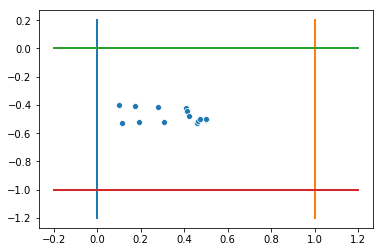

In [369]:
x = [0.1,-0.4] # Ponto Inicial
eps = 0.000001  # Precisão
max_iters = 1000  # Máx iterações

steps = descGradienteComBuscaPasso(x,eps,max_iters,False,'armijo')
print(steps)

sns.scatterplot(x=np.transpose(steps)[0],y=np.transpose(steps)[1])

plt.plot((0,0),(0.2,-1.2), linewidth=2)
plt.plot((1,1),(0.2,-1.2), linewidth=2)
plt.plot((1.2,-0.2),(0,0), linewidth=2)
plt.plot((1.2,-0.2),(-1,-1), linewidth=2)

Algoritmo de Newton

Hessiana de f(x)
https://www4f.wolframalpha.com/Calculate/MSP/MSP579823d8di5i52ig4275000057708810dh4a24b9?MSPStoreType=image/gif&s=6

In [11]:
def Hp(x):
    H11 = -2*x[1]*(x[1]+1)
    H12 = (1-x[0])*x[1]-x[0]*x[1]+(1-x[0])*(x[1]+1)-x[0]*(x[1]+1)
    H21 = (1-x[0])*x[1]-x[0]*x[1]+(1-x[0])*(x[1]+1)-x[0]*(x[1]+1)
    H22 = -2*(1-x[0])*x[0]
    return np.array([[H11,H12],[H21,H22]])

In [12]:
def Hf(x):
    H11 = ((1 - x[0])*x[1]*(x[1] + 1) - x[0]*x[1]*(x[1] + 1))**2/((1 - x[0])**2*x[0]**2*x[1]**2*(x[1] + 1)**2) + 2/((1 - x[0])*x[0])
    H12 = (((1 - x[0])*x[0]*x[1] + (1 - x[0])*x[0]*(x[1] + 1))*((1 - x[0])*x[1]*(x[1] + 1) - x[0]*x[1]*(x[1] + 1)))/((1 - x[0])**2*x[0]**2*x[1]**2*(x[1] + 1)**2) - ((1 - x[0])*x[1] - x[0]*x[1] + (1 - x[0])*(x[1] + 1) - x[0]*(x[1] + 1))/((1 - x[0])*x[0]*x[1]*(x[1] + 1))
    H21 = (((1 - x[0])*x[0]*x[1] + (1 - x[0])*x[0]*(x[1] + 1))*((1 - x[0])*x[1]*(x[1] + 1) - x[0]*x[1]*(x[1] + 1)))/((1 - x[0])**2*x[0]**2*x[1]**2*(x[1] + 1)**2) - ((1 - x[0])*x[1] - x[0]*x[1] + (1 - x[0])*(x[1] + 1) - x[0]*(x[1] + 1))/((1 - x[0])*x[0]*x[1]*(x[1] + 1))
    H22 = ((1 - x[0])*x[0]*x[1] + (1 - x[0])*x[0]*(x[1] + 1))**2/((1 - x[0])**2*x[0]**2*x[1]**2*(x[1] + 1)**2) - 2/(x[1]*(x[1] + 1))
    return np.array([[H11,H12],[H21,H22]]) 

In [435]:
Hf([1.2,0.4])

array([[-1.12, -2.52],
       [-2.52,  0.48]])

In [49]:
def NewtonComBuscaPasso(x,eps,max_iters,comCheckViavel,busca):
    steps = np.array([[x[0],x[1]]])
    if(comCheckViavel):
        if p(x) <= 0:
            print("Ponto Inicial fora da zona viável")
            return steps
        
    for _i in range(max_iters):
        x_k = np.copy(x)
        if busca == 'aurea':
            t = GSS(0.001,0.2,x_k,df(x_k))
        if busca == 'armijo':
            t = armijo2(0.9,0.5,x_k,df(x_k))
        
        x = np.subtract(x_k,t * np.dot(np.linalg.inv(Hf(x_k)),df(x_k)))

        steps = np.append(steps, [x], axis=0)
                
        if(comCheckViavel):
            if p(x) <= 0:
                print("Saiu da zona viável")
                break
        if abs(np.sum(np.absolute(np.subtract(x,x_k)))) <= eps: #Check passo muito pequeno (chegando perto do gradiente zero)
            print("Minimum at ", x)
            break  
        if not (all(abs(i) <= 2 for i in x)): # Para não ir muito longe < max_iters
            print("Fugiu")
            break
    return steps

Minimum at  [ 0.5 -0.5]
len steps 1127


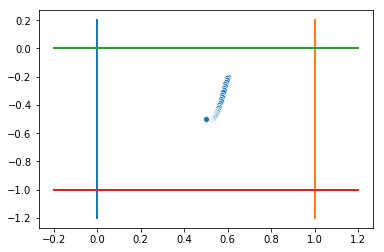

In [1039]:
x = [0.6,-0.2] # Ponto Inicial
eps = 0.00000000001  # Precisão
max_iters = 100000  # Máx iterações

steps = NewtonComGSS(x,eps,max_iters,False,0.001)
print('len steps',len(steps))
# for i in steps:
#     print(i)
sns.scatterplot(x=np.transpose(steps)[0],y=np.transpose(steps)[1])

plt.plot((0,0),(0.2,-1.2), linewidth=2)
plt.plot((1,1),(0.2,-1.2), linewidth=2)
plt.plot((1.2,-0.2),(0,0), linewidth=2)
plt.plot((1.2,-0.2),(-1,-1), linewidth=2)

Algoritmo de Quase Newton

In [237]:
def QuaseNewtonComBuscaPasso(x,eps,max_iters,comCheckViavel,metodo,busca):
    steps = np.array([[x[0],x[1]]])
    if(comCheckViavel):
        if p(x) <= 0:
            print("Ponto Inicial fora da zona viável")
            return steps
    H_k = np.array([[1,0],[0,1]])
    for _i in range(max_iters):
        x_k = np.copy(x)
        if busca == 'aurea':
            t = GSS(0.001,0.005,x_k,df(x_k))
        if busca == 'armijo':
            t = armijo2(0.9,0.5,x_k,df(x_k))
        x = np.subtract(x_k,t * np.dot(H_k,df(x_k)))
        steps = np.append(steps, [x], axis=0)

        p = np.array([np.subtract(x,x_k)])
        q = np.array([np.subtract(df(x),df(x_k))])
        p = p.T
        q = q.T
        
        if metodo == 'DFP' :
            if np.absolute(np.dot(np.dot(q.T,H_k),q)) == 0 or np.absolute(np.dot(p.T,q))==0:
                print('Zero no denominador H_k')
                break
            H_k = np.add(H_k,np.subtract(np.dot(p,p.T)/np.dot(p.T,q),np.dot(np.dot(np.dot(H_k,q),q.T),H_k)/np.dot(np.dot(q.T,H_k),q)))
#             print('H_k',H_k)
        if metodo == 'BFGS' :
            a = (1 + np.dot(np.dot(q.T,H_k),q)/np.dot(p.T,q))*(np.dot(p,p.T)/np.dot(p.T,q))
            b = np.add(np.dot(np.dot(p,q.T),H_k),np.dot(np.dot(H_k,q),p.T))/np.dot(p.T,q)
            H_k = np.subtract(np.add(H_k,a),b)
            
        if(comCheckViavel):
            if p(x) <= 0:
                print("Saiu da zona viável")
                break
                
        if abs(np.sum(np.absolute(np.subtract(x,x_k)))) <= eps: #Check passo muito pequeno (chegando perto do gradiente zero)
            print("Minimum at ", x)
            break  
        if not (all(abs(i) <= 2 for i in x)): # Para não ir muito longe < max_iters
            print("Fugiu")
            break
    return steps

In [174]:
# np.dot(np.array([-0.01261042,-0.85094909]),np.array([[-0.01261042],[0.85094909]]))
a = np.array([[-0.01261042,-0.85094909]])
b = np.array([[-0.01261042],[0.85094909]])
print(a.shape)
print(b.shape)
np.dot(b,a)

(1, 2)
(2, 1)


array([[ 1.59022693e-04,  1.07308254e-02],
       [-1.07308254e-02, -7.24114354e-01]])

----
a 0.08
u 0.17167184270002522
v 0.2283281572999748
b 0.32
----
a 0.08
u 0.13665631459994954
v 0.17167184270002522
b 0.2283281572999748
----
a 0.08
u 0.1150155281000757
v 0.13665631459994954
b 0.17167184270002522
----
a 0.1150155281000757
u 0.13665631459994954
v 0.15003105620015142
b 0.17167184270002522
----
a 0.13665631459994954
u 0.15003105620015142
v 0.15829710109982334
b 0.17167184270002522
----
a 0.13665631459994954
u 0.14492235949962146
v 0.15003105620015142
b 0.15829710109982334
----
a 0.14492235949962146
u 0.15003105620015142
v 0.15318840439929338
b 0.15829710109982334
----
a 0.14492235949962146
u 0.1480797076987634
v 0.15003105620015142
b 0.15318840439929338
----
a 0.14492235949962146
u 0.14687370800100946
v 0.1480797076987634
b 0.15003105620015142
u:  0.1480797076987634
v:  0.14882505650239747
Seção Áurea: 10 iterações
----
a 0.16
u 0.34334368540005045
v 0.4566563145999496
b 0.64
----
a 0.34334368540005045
u 0.4566563145999496
v 0.526687370800101
b 0.64
----
a 0.3433436854

v 0.15829710109982337
b 0.1634057978003533
----
a 0.15513975290068138
u 0.15829710109982337
v 0.16024844960121135
b 0.1634057978003533
----
a 0.15513975290068138
u 0.1570911014020694
v 0.15829710109982337
b 0.16024844960121135
u:  0.15634575259843536
v:  0.1570911014020694
Seção Áurea: 10 iterações
----
a 0.08
u 0.17167184270002522
v 0.2283281572999748
b 0.32
----
a 0.08
u 0.13665631459994954
v 0.17167184270002522
b 0.2283281572999748
----
a 0.13665631459994954
u 0.17167184270002522
v 0.19331262919989908
b 0.2283281572999748
----
a 0.13665631459994954
u 0.15829710109982337
v 0.17167184270002522
b 0.19331262919989908
----
a 0.13665631459994954
u 0.15003105620015142
v 0.15829710109982337
b 0.17167184270002522
----
a 0.15003105620015142
u 0.15829710109982337
v 0.1634057978003533
b 0.17167184270002522
----
a 0.15003105620015142
u 0.15513975290068138
v 0.15829710109982337
b 0.1634057978003533
----
a 0.15513975290068138
u 0.15829710109982337
v 0.16024844960121135
b 0.1634057978003533
----
a 

a 0.16
u 0.34334368540005045
v 0.4566563145999496
b 0.64
----
a 0.16
u 0.27331262919989907
v 0.34334368540005045
b 0.4566563145999496
----
a 0.16
u 0.2300310562001514
v 0.27331262919989907
b 0.34334368540005045
----
a 0.2300310562001514
u 0.27331262919989907
v 0.30006211240030284
b 0.34334368540005045
----
a 0.27331262919989907
u 0.30006211240030284
v 0.3165942021996467
b 0.34334368540005045
----
a 0.27331262919989907
u 0.2898447189992429
v 0.30006211240030284
b 0.3165942021996467
----
a 0.27331262919989907
u 0.283530022600959
v 0.2898447189992429
b 0.30006211240030284
----
a 0.283530022600959
u 0.2898447189992429
v 0.2937474160020189
b 0.30006211240030284
----
a 0.2898447189992429
u 0.2937474160020189
v 0.2961594153975268
b 0.30006211240030284
----
a 0.2898447189992429
u 0.2922567183947508
v 0.2937474160020189
b 0.2961594153975268
u:  0.291335416606511
v:  0.2922567183947508
Seção Áurea: 11 iterações
----
a 0.16
u 0.34334368540005045
v 0.4566563145999496
b 0.64
----
a 0.16
u 0.2733126

b 0.1417650113004795
----
a 0.1283902697002776
u 0.13154761789941954
v 0.13349896640080755
b 0.13665631459994954
----
a 0.13154761789941954
u 0.13349896640080755
v 0.13470496609856153
b 0.13665631459994954
u:  0.13275361759717352
v:  0.13349896640080755
Seção Áurea: 10 iterações
----
a 0.08
u 0.17167184270002522
v 0.2283281572999748
b 0.32
----
a 0.08
u 0.13665631459994954
v 0.17167184270002522
b 0.2283281572999748
----
a 0.08
u 0.1150155281000757
v 0.13665631459994954
b 0.17167184270002522
----
a 0.1150155281000757
u 0.13665631459994954
v 0.15003105620015142
b 0.17167184270002522
----
a 0.1150155281000757
u 0.1283902697002776
v 0.13665631459994954
b 0.15003105620015142
----
a 0.1150155281000757
u 0.12328157299974764
v 0.1283902697002776
b 0.13665631459994954
----
a 0.12328157299974764
u 0.1283902697002776
v 0.13154761789941957
b 0.13665631459994954
----
a 0.1283902697002776
u 0.13154761789941957
v 0.13349896640080758
b 0.13665631459994954
----
a 0.1283902697002776
u 0.1303416182016656

u 0.13665631459994954
v 0.17167184270002522
b 0.2283281572999748
----
a 0.08
u 0.1150155281000757
v 0.13665631459994954
b 0.17167184270002522
----
a 0.08
u 0.10164078649987382
v 0.1150155281000757
b 0.13665631459994954
----
a 0.10164078649987382
u 0.1150155281000757
v 0.12328157299974765
b 0.13665631459994954
----
a 0.1150155281000757
u 0.12328157299974765
v 0.12839026970027761
b 0.13665631459994954
----
a 0.1150155281000757
u 0.12012422480060568
v 0.12328157299974765
b 0.12839026970027761
----
a 0.12012422480060568
u 0.12328157299974765
v 0.12523292150113566
b 0.12839026970027761
----
a 0.12328157299974765
u 0.12523292150113566
v 0.1264389211988896
b 0.12839026970027761
u:  0.1244875726975016
v:  0.12523292150113566
Seção Áurea: 10 iterações
----
a 0.08
u 0.17167184270002522
v 0.2283281572999748
b 0.32
----
a 0.08
u 0.13665631459994954
v 0.17167184270002522
b 0.2283281572999748
----
a 0.08
u 0.1150155281000757
v 0.13665631459994954
b 0.17167184270002522
----
a 0.08
u 0.101640786499873

----
a 0.08
u 0.17167184270002522
v 0.2283281572999748
b 0.32
----
a 0.08
u 0.13665631459994954
v 0.17167184270002522
b 0.2283281572999748
----
a 0.08
u 0.1150155281000757
v 0.13665631459994954
b 0.17167184270002522
----
a 0.08
u 0.10164078649987382
v 0.1150155281000757
b 0.13665631459994954
----
a 0.10164078649987382
u 0.1150155281000757
v 0.12328157299974765
b 0.13665631459994954
----
a 0.1150155281000757
u 0.12328157299974765
v 0.12839026970027761
b 0.13665631459994954
----
a 0.12328157299974765
u 0.12839026970027761
v 0.13154761789941957
b 0.13665631459994954
----
a 0.12328157299974765
u 0.1264389211988896
v 0.12839026970027761
b 0.13154761789941957
----
a 0.12328157299974765
u 0.12523292150113566
v 0.1264389211988896
b 0.12839026970027761
u:  0.1244875726975016
v:  0.12523292150113566
Seção Áurea: 10 iterações
----
a 0.08
u 0.17167184270002522
v 0.2283281572999748
b 0.32
----
a 0.08
u 0.13665631459994954
v 0.17167184270002522
b 0.2283281572999748
----
a 0.08
u 0.1150155281000757
v

len steps 102
[ 0.03229835 -0.67585343]
[ 0.03693309 -0.43752598]
[ 0.05066318 -0.46102516]
[ 0.11381438 -0.49395849]
[ 0.72700098 -0.70507764]
[ 0.6541272  -0.67960009]
[ 0.64233114 -0.66927611]
[ 0.62864692 -0.65419645]
[ 0.61653037 -0.63898446]
[ 0.60544187 -0.62400824]
[ 0.59530707 -0.60977386]
[ 0.58591955 -0.5963628 ]
[ 0.57730269 -0.58403489]
[ 0.56933192 -0.5727473 ]
[ 0.56204396 -0.56262488]
[ 0.55542794 -0.55367877]
[ 0.54935179 -0.54572781]
[ 0.54383738 -0.53877963]
[ 0.53884385 -0.53274638]
[ 0.53429742 -0.5274972 ]
[ 0.53017408 -0.52296118]
[ 0.52644876 -0.51906629]
[ 0.52308105 -0.51572735]
[ 0.52004357 -0.51287729]
[ 0.5173265  -0.51046921]
[ 0.51487567 -0.50842134]
[ 0.512698   -0.50670926]
[ 0.5107443  -0.50526722]
[ 0.50901154 -0.50406968]
[ 0.50747783 -0.50308041]
[ 0.50612038 -0.50226659]
[ 0.50493119 -0.50160763]
[ 0.50389199 -0.50107942]
[ 0.50298296 -0.50066021]
[ 0.50218832 -0.50033339]
[ 0.5015068 -0.5000907]
[ 0.50095702 -0.49993086]
[ 0.50062688 -0.49986268]


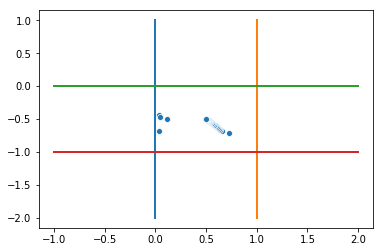

In [355]:
eps = 0.00000001  # Precisão
max_iters = 100000  # Máx iterações

steps = QuaseNewtonComBuscaPasso(np.array([ 0.03229835,-0.67585343]),eps,max_iters,False,'DFP','aurea')
print('len steps',len(steps))
for i in steps:
    print(i)
sns.scatterplot(x=np.transpose(steps)[0],y=np.transpose(steps)[1])

plt.plot((0,0),(1,-2), linewidth=2)
plt.plot((1,1),(1,-2), linewidth=2)
plt.plot((2,-1),(0,0), linewidth=2)
plt.plot((2,-1),(-1,-1), linewidth=2)

Gerador de Ponto no quadrante central

In [316]:
x = np.array([random.uniform(0,0.5),random.uniform(-0.5,0)])
eps = 0.000000001
max_iters = 10000
print(x)

[ 0.19791928 -0.02092016]


Gerador de Ponto Uniforme

In [302]:
x = np.array([random.uniform(-1,2),random.uniform(-2,1)])
eps = 0.000000001
max_iters = 10000
print(x)

[ 1.02955673 -1.14608056]


Timer

In [317]:
t0 = time.time()
steps = descGradiente2(x,0.01,eps,max_iters,False)
tf = time.time()

Minimum at  [ 0.49999995 -0.5       ]


Resultados

x_0  [ 0.19791928 -0.02092016]
iter  869
x_k  [ 0.49999995 -0.5       ]
f(x_k) 0
f+(x_k) 2.7725887222397905
0.04291582107543945 segundos.


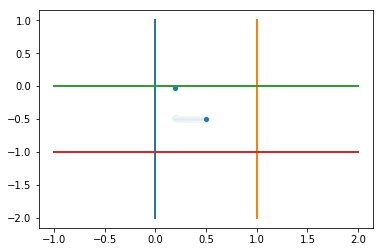

In [318]:
print('x_0 ',steps[0])
print('iter ',len(steps))
print('x_k ',steps[-1])
print('f(x_k)',f_Clean(steps[-1]))
print('f+(x_k)',f_Extended2(steps[-1]))
print(str(tf-t0) + ' segundos.')

sns.scatterplot(x=np.transpose(steps)[0],y=np.transpose(steps)[1])
plt.plot((0,0),(1,-2), linewidth=2)
plt.plot((1,1),(1,-2), linewidth=2)
plt.plot((2,-1),(0,0), linewidth=2)
plt.plot((2,-1),(-1,-1), linewidth=2)